In [1]:
from dDC_compute import input_gates, EShap, compute, EShap_naive, text_to_node
import pandas as pd
import time
import matplotlib.pyplot as plt

### dDNNF python form

#### Database

select * from personnel;

In [2]:
# id |   name         |   position   |   city   | classification |               provsql                
# ----+----------+--------------+----------+----------------+--------------------------------------
#   1 | John     (10) | Director     | New York | unclassified   | f019b90a-56ac-4f41-9a0a-b587ceff2ac5
#   2 | Paul     (12) | Janitor      | New York | restricted     | 9ff8262d-f23c-4601-ba68-3210d55ac1a6
#   3 | Dave      (4) | Analyst      | Paris    | confidential   | ae268f66-ec84-4267-8e26-c17be484e603
#   4 | Ellen     (0) | Field agent  | Berlin   | secret         | d98e765f-99e3-4e02-8390-7a4b807704cc
#   5 | Magdalen  (6) | Double agent | Paris    | top_secret     | aab08929-c9ac-4da0-a18a-eb649bd38e35
#   6 | Nancy     (8) | HR           | Paris    | restricted     | 6c14c3a5-0884-4b4f-83b6-c287826a386c
#   7 | Susan     (2) | Analyst      | Berlin   | secret         | c2abbfa2-e426-4e47-a5de-43817938f2ff

#### Query: Cities with only one person in the table
select name, city, round(shapley(c.provenance, p.provenance)::numeric,3) as shapley, get_prob(p.provenance) from (select provenance() from (select distinct 1 from (
    (SELECT DISTINCT city FROM personnel)
  EXCEPT
    (SELECT p1.city                              
     FROM personnel p1, personnel p2
     WHERE p1.city = p2.city AND p1.id < p2.id
     GROUP BY p1.city
     ORDER BY p1.city)
  ) t) u) as c, (select *, provenance() from personnel) as p order by city,name;

In [3]:
ddnnf, probs = text_to_node('export.dd')

In [4]:
input_gates(ddnnf)

['12', '6', '10', '0', '8', '2', '4']

#### Equal probabilities (=1)

In [5]:
# id |   name         |   position   |   city   | probabilities |               Expected_shap                
# ----+----------+--------------+----------+----------------+--------------------------------------
#   1 | John     (10) | Director     | New York |      1.0      |                  -0.0357
#   2 | Paul     (12) | Janitor      | New York |      1.0      |                  -0.0357
#   3 | Dave      (4) | Analyst      | Paris    |      1.0      |                   0.0476
#   4 | Ellen     (0) | Field agent  | Berlin   |      1.0      |                  -0.0357
#   5 | Magdalen  (6) | Double agent | Paris    |      1.0      |                   0.0476
#   6 | Nancy     (8) | HR           | Paris    |      1.0      |                   0.0476
#   7 | Susan     (2) | Analyst      | Berlin   |      1.0      |                  -0.0357

#### Paul set to zero

In [6]:
# id |   name         |   position   |   city   | probabilities |               Expected_shap                
# ----+----------+--------------+----------+----------------+--------------------------------------
#   1 | John     (10) | Director     | New York |      1.0      |                   0.5167
#   2 | Paul     (12) | Janitor      | New York |      0.0      |                   0.0000
#   3 | Dave      (4) | Analyst      | Paris    |      1.0      |                   0.0833
#   4 | Ellen     (0) | Field agent  | Berlin   |      1.0      |                   0.1167
#   5 | Magdalen  (6) | Double agent | Paris    |      1.0      |                   0.0833
#   6 | Nancy     (8) | HR           | Paris    |      1.0      |                   0.0833
#   7 | Susan     (2) | Analyst      | Berlin   |      1.0      |                   0.1167

#### Equal probabilities ( = 0.5)

In [7]:
# id |   name         |   position   |   city   | probabilities |               Expected_shap                
# ----+----------+--------------+----------+----------------+--------------------------------------
#   1 | John     (10) | Director     | New York |      0.5      |                   0.1384
#   2 | Paul     (12) | Janitor      | New York |      0.5      |                   0.1384
#   3 | Dave      (4) | Analyst      | Paris    |      0.5      |                   0.0967
#   4 | Ellen     (0) | Field agent  | Berlin   |      0.5      |                   0.1384
#   5 | Magdalen  (6) | Double agent | Paris    |      0.5      |                   0.0967
#   6 | Nancy     (8) | HR           | Paris    |      0.5      |                   0.0967
#   7 | Susan     (2) | Analyst      | Berlin   |      0.5      |                   0.1384

#### Unequal probabilities

In [8]:
# id |   name         |   position   |   city   | probabilities |               Expected_shap                
# ----+----------+--------------+----------+----------------+--------------------------------------
#   1 | John     (10) | Director     | New York |      0.1      |                   0.0369
#   2 | Paul     (12) | Janitor      | New York |      0.2      |                   0.0805
#   3 | Dave      (4) | Analyst      | Paris    |      0.3      |                   0.0555
#   4 | Ellen     (0) | Field agent  | Berlin   |      0.4      |                   0.0927
#   5 | Magdalen  (6) | Double agent | Paris    |      0.5      |                   0.1133
#   6 | Nancy     (8) | HR           | Paris    |      0.6      |                   0.1558
#   7 | Susan     (2) | Analyst      | Berlin   |      0.7      |                   0.2642

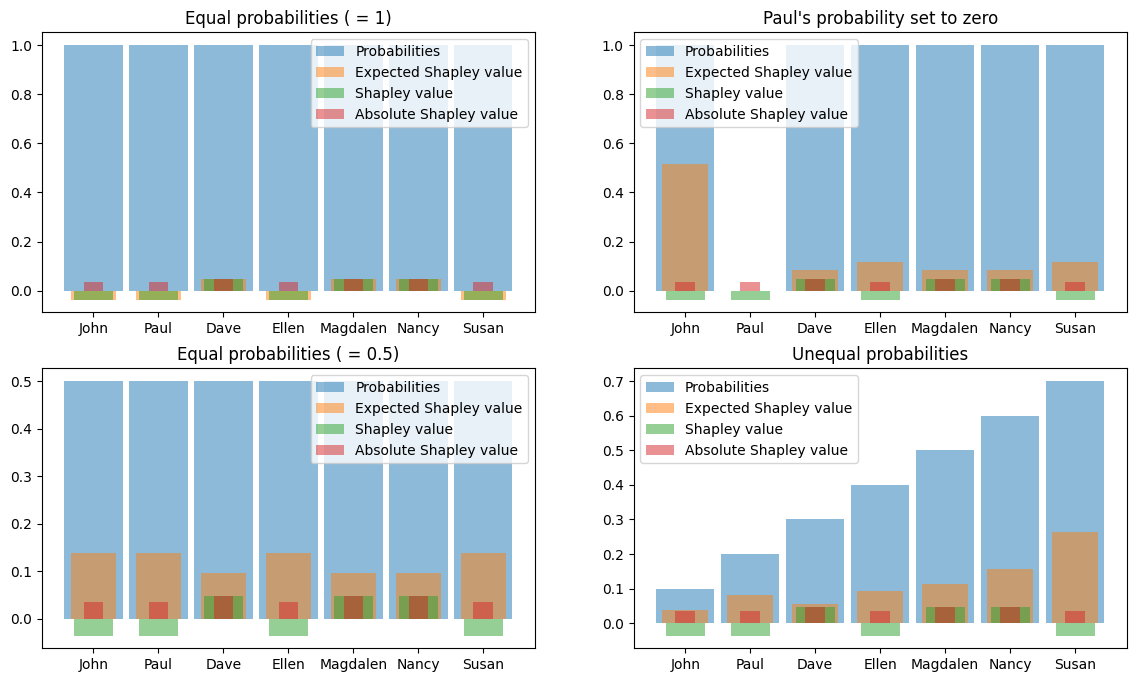

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [1,1,1,1,1,1,1], width = 0.9, label = "Probabilities", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [-0.0357,-0.0357,0.0476,-0.0357,0.0476,0.0476,-0.0357], width = 0.7, label = "Expected Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [-0.0357,-0.0357,0.0476,-0.0357,0.0476,0.0476,-0.0357], width = 0.6, label = "Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.0357,0.0357,0.0476,0.0357,0.0476,0.0476,0.0357], width = 0.3, label = "Absolute Shapley value", alpha = 0.5)
plt.title("Equal probabilities ( = 1)")
plt.legend()

plt.subplot(2,2,2)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [1,0,1,1,1,1,1], width = 0.9, label = "Probabilities", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.5167,0.0000,0.0833,0.1167,0.0833,0.0833,0.1167], width = 0.7, label = "Expected Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [-0.0357,-0.0357,0.0476,-0.0357,0.0476,0.0476,-0.0357], width = 0.6, label = "Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.0357,0.0357,0.0476,0.0357,0.0476,0.0476,0.0357], width = 0.3, label = "Absolute Shapley value", alpha = 0.5)
plt.title("Paul's probability set to zero")
plt.legend()

plt.subplot(2,2,3)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.5,0.5,0.5,0.5,0.5,0.5,0.5], width = 0.9, label = "Probabilities", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.1384,0.1384,0.0967,0.1384,0.0967,0.0967,0.1384], width = 0.7, label = "Expected Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [-0.0357,-0.0357,0.0476,-0.0357,0.0476,0.0476,-0.0357], width = 0.6, label = "Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.0357,0.0357,0.0476,0.0357,0.0476,0.0476,0.0357], width = 0.3, label = "Absolute Shapley value", alpha = 0.5)
plt.title("Equal probabilities ( = 0.5)")
plt.legend()

plt.subplot(2,2,4)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.1,0.2,0.3,0.4,0.5,0.6,0.7], width = 0.9, label = "Probabilities", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.0369,0.0805,0.0555,0.0927,0.1133,0.1558,0.2642], width = 0.7, label = "Expected Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [-0.0357,-0.0357,0.0476,-0.0357,0.0476,0.0476,-0.0357], width = 0.6, label = "Shapley value", alpha = 0.5)
plt.bar(x = ["John", "Paul", "Dave", "Ellen", "Magdalen", "Nancy", "Susan"], height = [0.0357,0.0357,0.0476,0.0357,0.0476,0.0476,0.0357], width = 0.3, label = "Absolute Shapley value", alpha = 0.5)
plt.title("Unequal probabilities")
plt.legend()

plt.savefig("prob_shap.pdf")
plt.savefig("prob_shap.png")

plt.show()

### All variables(tuples) with same probability ( = 1)

In [11]:
query, probs = text_to_node('export.dd')

data = pd.DataFrame({"t": [i for i in input_gates(query)], "p":[1,1,1,1,1,1,1]})
shap_sum = 0
t_shap = []
t_shap_naive = []
for x in input_gates(query):
    print("Node",x)
    t1 = time.time()
    eshap = EShap(query, x, data)
    t1 = time.time() - t1
    t_shap.append(t1)
    print(eshap, "Ours", "Time:", t1, "sec")
    t2 = time.time()
    eshap_naive = EShap_naive(query, x, data)
    t2 = time.time() - t2
    t_shap_naive.append(t2)
    print(eshap_naive, "Naive", "Time:", t2, "sec", '\n')
    shap_sum += eshap
print('Shap sum',shap_sum)
print("All true query value", float(compute(query,{i:True for i in input_gates(query)}).value))

Node 12
-0.03571428571428571 Ours Time: 0.13460755348205566 sec
-0.035714285714285754 Naive Time: 37.55339455604553 sec 

Node 6
0.04761904761904763 Ours Time: 0.13338875770568848 sec
0.04761904761904759 Naive Time: 37.05543851852417 sec 

Node 10
-0.03571428571428571 Ours Time: 0.12808656692504883 sec
-0.035714285714285754 Naive Time: 37.62801909446716 sec 

Node 0
-0.03571428571428571 Ours Time: 0.12578058242797852 sec
-0.035714285714285754 Naive Time: 37.10932755470276 sec 

Node 8
0.04761904761904763 Ours Time: 0.22175359725952148 sec
0.04761904761904759 Naive Time: 36.907094955444336 sec 

Node 2
-0.03571428571428571 Ours Time: 0.12102198600769043 sec
-0.035714285714285754 Naive Time: 37.21168780326843 sec 

Node 4
0.04761904761904763 Ours Time: 0.12430953979492188 sec
0.04761904761904759 Naive Time: 37.62562704086304 sec 

Shap sum 4.163336342344337e-17
All true query value 0.0


### All variables(tuples) with same probability ( = 1/2)

In [12]:
query, probs = text_to_node('export.dd')

data = pd.DataFrame({"t": [i for i in probs], "p":[1/2,1/2,1/2,1/2,1/2,1/2,1/2]})
shap_sum = 0
t_shap = []
t_shap_naive = []
for x in input_gates(query):
    print("Node",x)
    t1 = time.time()
    eshap = EShap(query, x, data)
    t1 = time.time() - t1
    t_shap.append(t1)
    print(eshap, "Ours", "Time:", t1, "sec",'\n')
    # t2 = time.time()
    # eshap_naive = EShap_naive(query, x, data)
    # t2 = time.time() - t2
    # t_shap_naive.append(t2)
    # print(eshap_naive, "Naive", "Time:", t2, "sec", '\n')
    shap_sum += eshap
print('Shap sum',shap_sum)
print("All true query value", float(compute(query,{i:True for i in input_gates(query)}).value))

Node 12
0.13839285714285715 Ours Time: 0.1246480941772461 sec 

Node 6
0.09672619047619047 Ours Time: 0.12195515632629395 sec 

Node 10
0.13839285714285715 Ours Time: 0.12146544456481934 sec 

Node 0
0.13839285714285715 Ours Time: 0.12171053886413574 sec 

Node 8
0.09672619047619047 Ours Time: 0.1219637393951416 sec 

Node 2
0.13839285714285715 Ours Time: 0.15359735488891602 sec 

Node 4
0.09672619047619047 Ours Time: 0.1216580867767334 sec 

Shap sum 0.84375
All true query value 0.0


### Unequal probabilities

In [13]:
query, probs = text_to_node('export.dd')

data = pd.DataFrame({"t": [i for i in probs], "p":[probs[i] for i in probs]})
shap_sum = 0
t_shap = []
t_shap_naive = []
for x in input_gates(query):
    print("Node",x)
    t1 = time.time()
    eshap = EShap(query, x, data)
    t1 = time.time() - t1
    t_shap.append(t1)
    print(eshap, "Ours", "Time:", t1, "sec",'\n')
    # t2 = time.time()
    # eshap_naive = EShap_naive(query, x, data)
    # t2 = time.time() - t2
    # t_shap_naive.append(t2)
    # print(eshap_naive, "Naive", "Time:", t2, "sec", '\n')
    shap_sum += eshap
print('Shap sum',shap_sum)
print("All true query value", float(compute(query,{i:True for i in input_gates(query)}).value))

Node 12
0.08049733333333334 Ours Time: 0.15150737762451172 sec 

Node 6
0.113334 Ours Time: 0.12186026573181152 sec 

Node 10
0.03696533333333334 Ours Time: 0.12341022491455078 sec 

Node 0
0.09270666666666667 Ours Time: 0.12677383422851562 sec 

Node 8
0.15585199999999996 Ours Time: 0.12814736366271973 sec 

Node 2
0.2642506666666667 Ours Time: 0.12700486183166504 sec 

Node 4
0.055557999999999996 Ours Time: 0.1290438175201416 sec 

Shap sum 0.799164
All true query value 0.0


### One variable (tuple) with 0 probability

In [14]:
query, probs = text_to_node('export.dd')

data = pd.DataFrame({"t": [i for i in probs], "p":[1,1,1,0,1,1,1]})
shap_sum = 0
t_shap = []
t_shap_naive = []
for x in input_gates(query):
    print("Node",x)
    t1 = time.time()
    eshap = EShap(query, x, data)
    t1 = time.time() - t1
    t_shap.append(t1)
    print(eshap, "Ours", "Time:", t1, "sec",'\n')
    # t2 = time.time()
    # eshap_naive = EShap_naive(query, x, data)
    # t2 = time.time() - t2
    # t_shap_naive.append(t2)
    # print(eshap_naive, "Naive", "Time:", t2, "sec", '\n')
    shap_sum += eshap
print('Shap sum',shap_sum)
print("All true query value", float(compute(query,{i:True for i in input_gates(query)}).value))

Node 12
-0.0 Ours Time: 0.1343841552734375 sec 

Node 6
0.08333333333333334 Ours Time: 0.12668275833129883 sec 

Node 10
0.5166666666666666 Ours Time: 0.12526798248291016 sec 

Node 0
0.11666666666666667 Ours Time: 0.12418889999389648 sec 

Node 8
0.08333333333333334 Ours Time: 0.12566637992858887 sec 

Node 2
0.11666666666666667 Ours Time: 0.1222684383392334 sec 

Node 4
0.08333333333333334 Ours Time: 0.1234292984008789 sec 

Shap sum 1.0
All true query value 0.0
